<a href="https://colab.research.google.com/github/uscmlsystems/ml-systems-hw1-Lvyuche/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 599 HW 1: Gradient Descent

Your task in this Colab notebook is to fill out the sections that are specified by **TODO** (please search the keyword `TODO` to make sure you do not miss any).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(['ggplot'])

## Gradient Descent for Linear Regression

Given two vectors, X and Y, that represent the input and output values of a linear relationship, we can fit a line to this data to predict the output for other values of X. This can be done by finding the parameters $w$ and $b$ of the line, such that the line minimizes the squared error between the predicted and actual output values.

The equation for the line is:

\begin{equation}
\hat{y} = w \cdot x + b
\end{equation}

where:

* $\hat{y}$ is the predicted output value.
* $w$ is the slope
* $b$ is the intercept

Let's use Gradient Descent to find the best values for $\theta$ as defined below:

\begin{equation}
\theta = \begin{bmatrix} w \\ b\end{bmatrix} \end{equation}


## Create Data

Let's generate some data with:

\begin{equation} \theta = \begin{bmatrix} 2 \\ 3 \end{bmatrix} \end{equation}

We will use this data to fit the line and then use it to predict the output for other values of $x$.
*   `number_of_samples` is an integer variable
*   X is a vector of `number_of_samples` numbers between 1, 100
*   Y is a vector of `number_of_samples` numbers where each $y = w \cdot x + b$ plus some noise, which is a random value between 0 and 1.


In [ ]:
number_of_samples = 100

X = 2 * np.random.rand(number_of_samples, 1)
y = 2 * X + np.random.rand(number_of_samples, 1) + 3

theta_guess = np.array([[1.0], [1.0]])
learning_rate = 0.001
num_iterations = 500

final_cost = {}
final_theta = {}

Plot and visualize your data.

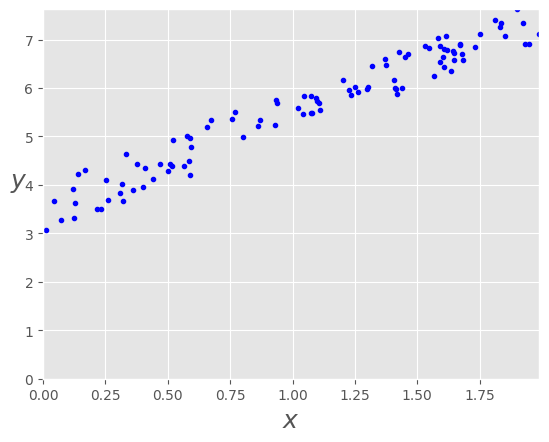

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ = plt.axis([0,np.max(X),0,np.max(y)])

## Gradient Descent Implementation

The equation for calculating cost function and gradients are as shown below.

Make prediction:

\begin{equation}
\hat{y} =w \cdot x + b
\end{equation}

Mean squared error:

\begin{equation}
J(w, b) = \text{MSE}(w, b) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{n} \sum_{i=1}^n (e_i)^2
\end{equation}

where residul error is
\begin{equation}
e_i=\hat{y}_i - y_i
\end{equation}

Gradient:

\begin{equation}
\nabla J(w, b) = \left( \frac{\partial J}{\partial w}, \frac{\partial J}{\partial b} \right)
\end{equation}

Apply chain rule:

\begin{equation}
\nabla J(w, b) = \left( \sum_{i=1}^n (\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial w}), \sum_{i=1}^n(\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial b}) \right)
\end{equation}

\begin{equation}
= \left( \frac{2}{n} \sum_{i=1}^n e_i \times {x}_i, \frac{2}{n} \sum_{i=1}^n e_i \times 1 \right)
\end{equation}

Replace $e_i$:

\begin{equation}
\nabla J(w, b) = \left( \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times {x}_i, \frac{2}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \times 1 \right)
\end{equation}

### **TODO 1:**
If we define the residual error as $(y_i - \hat{y}_i)$, will the graident equation $\nabla J(w, b)$ change? Show your derive.

Your answer:

If we redefine the residual error as $(y_i - \hat{y}_i)$, the gradient equation $\nabla J(w, b)$ changes as follows:

New residual error:

\begin{equation}
e_i = y_i - \hat{y}_i
\end{equation}

The gradient becomes:

\begin{equation}
\nabla J(w, b) = \left( \sum_{i=1}^n (\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial w}), \sum_{i=1}^n(\frac{\partial J}{\partial e_i} \cdot \frac{\partial e_i}{\partial b}) \right)
\end{equation}

\begin{equation}
= \left( -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i) \times {x}_i, -\frac{2}{n} \sum_{i=1}^n (y_i - \hat{y}_i) \right)
\end{equation}

Thus, with the new definition of $e_i$, the signs of the components of the gradient vector are reversed.


### **TODO 2:**

In the next cell, write the Python code for the following functions:

In [ ]:
def calculate_prediction_residuals(theta, X, y):
    """
    Calculate the predictions and residuals for a linear regression model.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,).
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
     Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).

    Returns:
    - predictions (numpy.ndarray): Model predictions of shape (num_samples,).
    - residuals (numpy.ndarray): Model residuals of shape (num_samples,).
    """

    predictions = X.dot(theta)
    residuals = y - predictions

    return predictions, residuals


def calculate_cost(theta, X, y):
    """
    Calculate the cost (Mean Squared Error) for a linear regression model.

    Parameters:
    - theta (numpy.ndarray): Parameter vector of shape (num_features,)
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
    - y (numpy.ndarray): Target values of shape (num_samples,)

    Returns:
    - cost (float): Computed cost value
    """

    predictions, residuals = calculate_prediction_residuals(theta, X, y)
    cost = np.mean(residuals ** 2)

    return cost

def calculate_gradient(X, residuals):
    """
    Calculate the gradient for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features)
    - residuals (numpy.ndarray): Residuals (difference between predictions and target values) of shape (num_samples,).

    Returns:
    - gradient (numpy.ndarray): Gradient vector of shape (num_features,).
    """

    n = len(residuals)
    gradient = -(2/n) * X.T.dot(residuals)

    return gradient

### **TODO 3:**
In the next cell, write the Python code to implement Gradient Descent.

In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    """
    Perform gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    - theta_history (list): List of parameter vectors over iterations.
    """

    cost_history = []
    theta_history = []

    for i in range(num_iterations):
        predictions, residuals = calculate_prediction_residuals(theta, X, y)
        cost = calculate_cost(theta, X, y)
        gradient = calculate_gradient(X, residuals)

        theta = theta - learning_rate * gradient

        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history

## Gradient Descent Virtualization

In the next cell, run the GD implementation, store the cost for each iteration and plot the cost vs. iterations.

Start:
w:          1.000,
b:          1.000
End:
w:          2.515,
b:          2.492
Final cost/MSE:  0.406


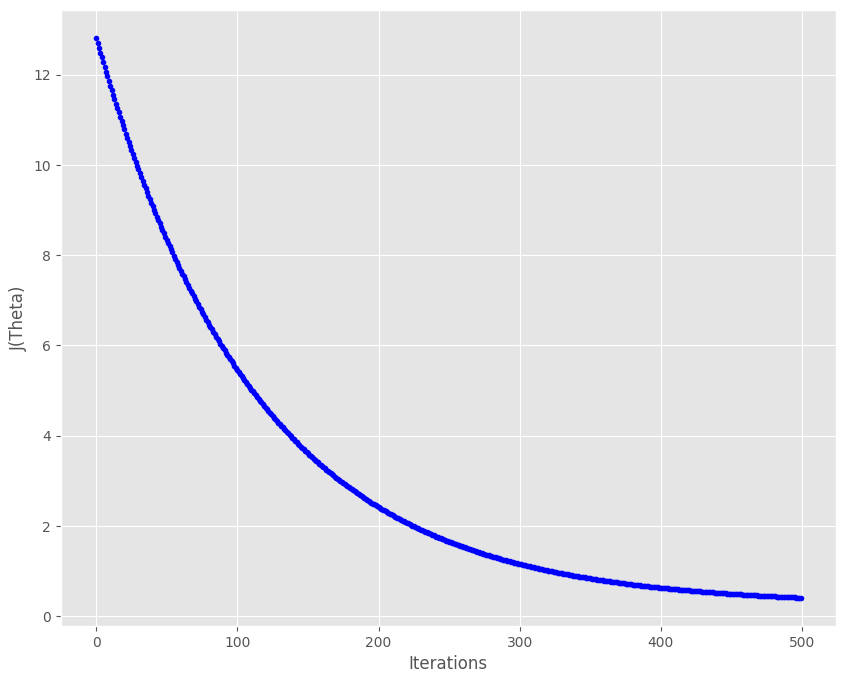

In [ ]:
theta = theta_guess.copy()

print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[X, np.ones((len(X), 1))]

# Run Gradient Descent:
theta, cost_history, theta_history = gradient_descent(
    X_b, y, theta, learning_rate, num_iterations
)
final_theta['GD']= theta


print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['GD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history,'b.')

To have a better understanding of how gradient descent actually works, we build a function that virtualizes the training dynamics for different iterations and learning rates combination.

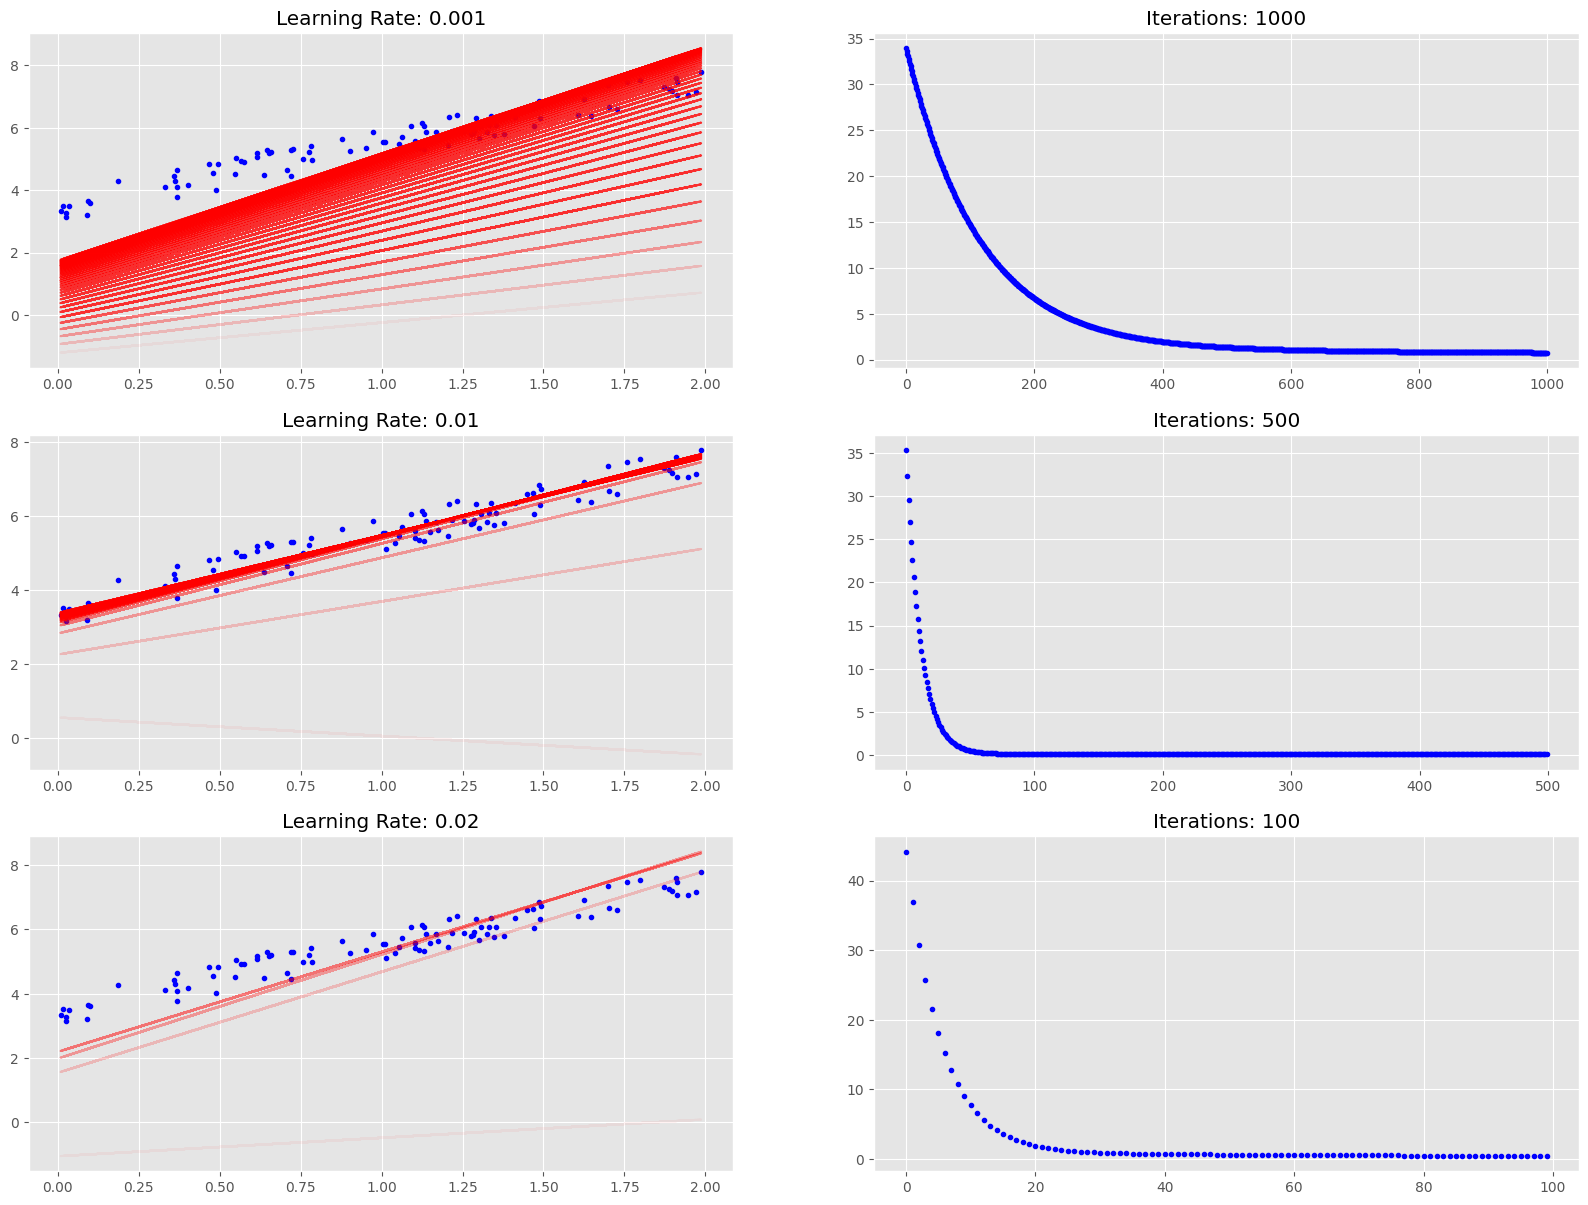

In [ ]:
def plot_gradient_descent(
    num_iterations, learning_rate, X_b, y, data_axis, cost_axis=None
):
    """
    Visualize gradient descent optimization for linear regression.

    Parameters:
    - num_iterations (int): Number of iterations for gradient descent.
    - learning_rate (float): Learning rate for gradient descent.
    - X_b (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - data_axis (matplotlib Axis): Axis to visualize the data points and regression lines.
    - cost_axis (matplotlib Axis): Optional axis to visualize the cost history vs. iterations.

    """
    # Plot the data points as blue dots
    data_axis.plot(
        # Assuming the second column is for the intercept term, select the
        # first column.
        X_b[:, 0], y, "b."
    )
    # Initialize random theta values from a standard normal distribution
    theta = np.random.randn(2, 1)

    # Initial transparency value for plotting regression lines
    transparency = 0.05

    # Initialize an array to store cost history during iterations
    cost_history = np.zeros(num_iterations)

    # Loop through each iteration
    for i in range(num_iterations):
        # Compute predictions using the current theta values
        predictions_prev = X_b.dot(theta)

        # Perform one iteration of gradient descent to update theta values
        theta, current_cost, _ = gradient_descent(X_b, y, theta, learning_rate, 1)

        # Compute predictions using the updated theta values
        predictions = X_b.dot(theta)

        # Store the cost value after the current iteration
        cost_history[i] = current_cost[0]

        # Plot the regression line with adjusted transparency
        if i % 25 == 0:
            data_axis.plot(
                X_b[:, 0], predictions, "r-", alpha=transparency
            )  # Assuming the first column is for the intercept term
            if transparency < 0.8:
                transparency += 0.15

    # If provided, plot cost history vs. iterations
    if cost_axis is not None:
        cost_axis.plot(range(num_iterations), cost_history, "b.")


# Create a figure with subplots for visualization
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# List of iteration and learning rate pairs to iterate through
number_of_iteration_learning_rate_pairs = [(1000, 0.001), (500, 0.01), (100, 0.02)]

# Initialize the subplot count for positioning
subplot_count = 0

# Loop through each iteration and learning rate pair
for number_of_iterations, learning_rate in number_of_iteration_learning_rate_pairs:
    # Increment the subplot count and create data and cost axes
    subplot_count += 1
    data_axis = fig.add_subplot(4, 2, subplot_count)
    subplot_count += 1
    cost_axis = fig.add_subplot(4, 2, subplot_count)

    # Set titles for the data and cost axes
    data_axis.set_title("Learning Rate: {}".format(learning_rate))
    cost_axis.set_title("Iterations: {}".format(number_of_iterations))

    # Call the function to visualize gradient descent
    plot_gradient_descent(
        number_of_iterations, learning_rate, X_b, y, data_axis, cost_axis
    )

## Stochastic Gradient Descent

The main difference between SGD and GD is that SGD uses a **single training example** to update the model parameters at each iteration, while GD uses all of the training examples.


* SGD is less computationally expensive than GD and can converge faster. However, SGD can be more noisy than GD, which means that it may not always converge to the global minimum of the function.
* GD is more robust to outliers and is less likely to get stuck in local minima. However, GD can be more computationally expensive than SGD and may take longer to converge.


### **TODO 4:**
In the next cell, write a function to implement SGD.

In [ ]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    """
    Perform stochastic gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """

    cost_history = np.zeros(iterations)
    m = len(y)

    for it in range(iterations):
        cost = 0.0
        i = np.random.randint(m)
        xi = X[i:i+1]
        yi = y[i:i+1]
        prediction = np.dot(xi, theta)
        residuals = yi - prediction
        gradients = -2 * xi.T.dot(residuals)
        theta = theta - learning_rate * gradients
        cost = residuals ** 2
        cost_history[it] = cost

    return theta, cost_history

Run your SGD implementation and plot the cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          2.548,
b:          2.458
Final cost/MSE:  0.007


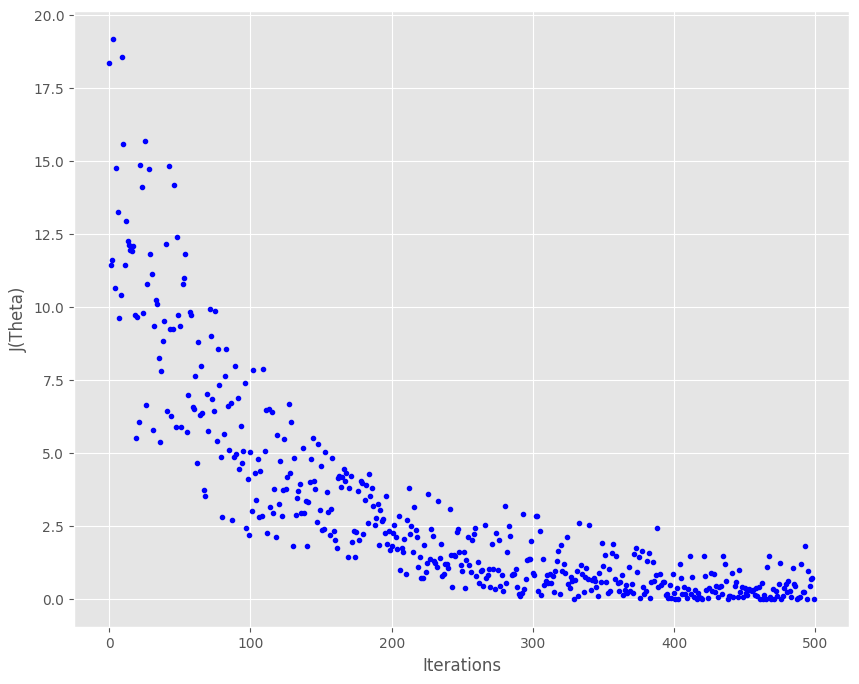

In [ ]:
theta = theta_guess.copy()


print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

X_b = np.c_[X, np.ones((len(X), 1))]

theta, cost_history = stochastic_gradient_descent(
    X_b, y, theta, learning_rate, num_iterations
)
final_theta['SGD']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['SGD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history[:num_iterations],'b.')

## Stochastic Gradient Descent with Momentum

Stochastic Gradient Descent (SGD) with momentum is an optimization technique that incorporates momentum to enhance the convergence of the optimization process. It is particularly useful for training machine learning models, including neural networks. The momentum term helps to smooth out variations in the gradient updates and accelerates convergence along the steepest direction.

In SGD with momentum, the update rule for the parameters involves a velocity term that accumulates a fraction of the previous gradients. This velocity term adds inertia to the updates, helping the optimization process to move more consistently and smoothly through the optimization landscape. The formula for the update step is as follows:

Velocity Update:

\begin{equation}
v_t = \beta \cdot v_{t-1} + (1 - \beta) \cdot \nabla J(\theta_t)
\end{equation}


Parameter Update:

\begin{equation}
\theta_{t+1} = \theta_t - \alpha \cdot v_t
\end{equation}

* $v_t$ is the velocity at iteration $t$.
* $\beta$ is the momentum parameter between 0 and 1, controlling the retention of previous velocity.
* $\nabla J(\theta_{t})$ is the gradient of the cost function at iteration $t$ with respect to the parameters $\theta_{t}$
* $\alpha$ is the learning rate.

The velocity term $v_t$ accumulates a fraction of the previous velocity $v_{t-1}$ and adds the current gradient update $\nabla J(\theta)$
 scaled by $(1-\beta)$. The parameters $\theta_{t+1}$ are then updated by subtracting the scaled velocity term.

### **TODO 5:**
In the next cell, implement the SGD with Momentum.


In [ ]:
def stochastic_gradient_descent_with_momentum(X, y, theta, learning_rate=0.01, momentum=0.9, iterations=10):
    """
    Perform stochastic gradient descent with momentum to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector.
    - learning_rate (float): Learning rate for stochastic gradient descent.
    - momentum (float): Momentum coefficient.
    - iterations (int): Number of iterations for stochastic gradient descent.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (numpy.ndarray): Array of cost values over iterations.
    """

    m = len(y)
    cost_history = np.zeros(iterations)
    velocity = np.zeros_like(theta)  # Initialize velocity vector

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index, :]
            y_i = y[random_index]

            # Compute the gradient for one sample
            prediction = np.dot(x_i, theta)
            residual = y_i - prediction
            gradient = -2 * x_i.reshape(-1, 1) * residual  # Reshape to ensure proper matrix multiplication

            # Update the velocity
            velocity = momentum * velocity - learning_rate * gradient

            # Update parameters
            theta += velocity

            # Compute the cost for this iteration
            cost += residual ** 2

        cost_history[it] = cost / m

    return theta, cost_history

Call your implementaiton of SGD with Momentum and plot the Cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          2.064,
b:          3.514
Final cost/MSE:  0.080


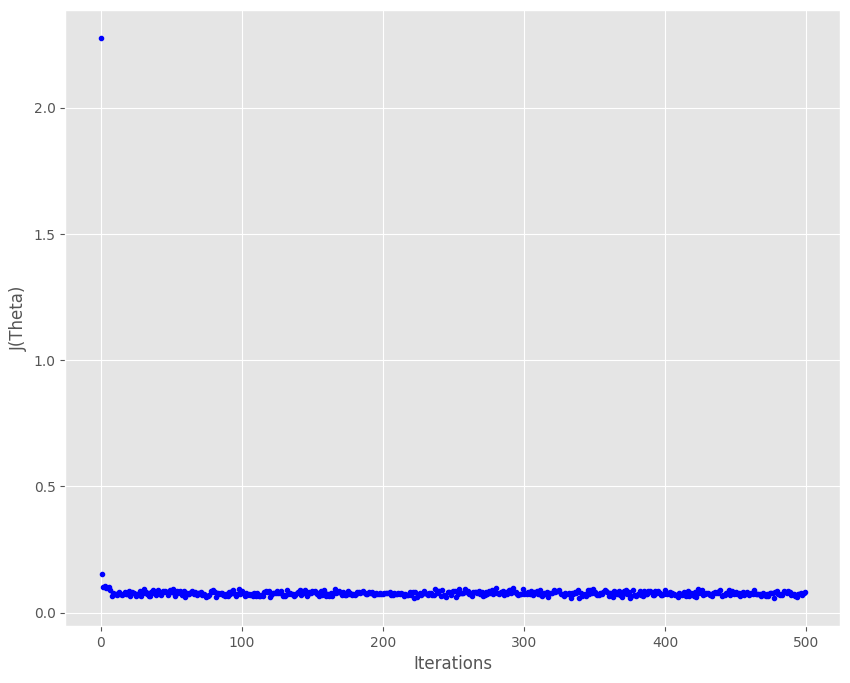

In [ ]:
theta = theta_guess.copy()
momentum = 0.9


print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
X_b = np.c_[X, np.ones((len(X), 1))]
theta, cost_history = stochastic_gradient_descent_with_momentum(
    X_b, y, theta, learning_rate, momentum, num_iterations
)
final_theta['SGDM']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['SGDM']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(num_iterations),cost_history[:num_iterations],'b.')

# Mini Batch Stochastic Gradient Descent

Mini-batch stochastic gradient descent (MBSGD) is a variation of stochastic gradient descent (SGD) where updates are made using small batches of data instead of single examples.

This strikes a balance between the efficiency of using the entire dataset (batch gradient descent) and the randomness of SGD.

MBSGD computes gradients and updates model parameters in each iteration using a randomly selected mini-batch of data.

This approach can lead to faster convergence and better utilization of computational resources compared to traditional SGD or full-batch gradient descent.

The size of the mini-batch is a tunable hyperparameter that influences the trade-off between convergence speed and noise in the updates.

### **TODO 6:**
In the next cell, implement MBSGD.

In [ ]:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, num_iterations=10, batch_size=20):
    """
    Perform mini-batch gradient descent to optimize parameters for linear regression.

    Parameters:
    - X (numpy.ndarray): Feature matrix of shape (num_samples, num_features).
                         Each row represents a sample, and each column represents a feature.
                         The last column should be filled with ones for the intercept term.
                         Example:
                         [[feature_1_sample_1, feature_2_sample_1, 1],
                          [feature_1_sample_2, feature_2_sample_2, 1],
                          ...
                          [feature_1_sample_n, feature_2_sample_n, 1]]
    - y (numpy.ndarray): Target values of shape (num_samples,).
    - theta (numpy.ndarray): Initial parameter vector of shape (num_features,).
    - learning_rate (float): Learning rate for gradient descent.
    - num_iterations (int): Number of iterations for gradient descent.
    - batch_size (int): Size of each mini-batch.

    Returns:
    - theta (numpy.ndarray): Optimized parameter vector.
    - cost_history (list): List of cost values over iterations.
    """

    m = len(y)
    cost_history = []

    for iteration in range(num_iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            predictions = X_i.dot(theta)
            residuals = predictions - y_i
            gradients = X_i.T.dot(residuals) / batch_size

            theta = theta - learning_rate * gradients
            cost += np.sum((residuals ** 2) / (2 * batch_size))

        average_cost = cost / (m / batch_size)
        cost_history.append(average_cost)

    return theta, cost_history

Run your implementation and plot the cost vs iteration.

Start:
w:          1.000,
b:          1.000
End:
w:          2.410,
b:          2.983
Final cost/MSE:  0.065


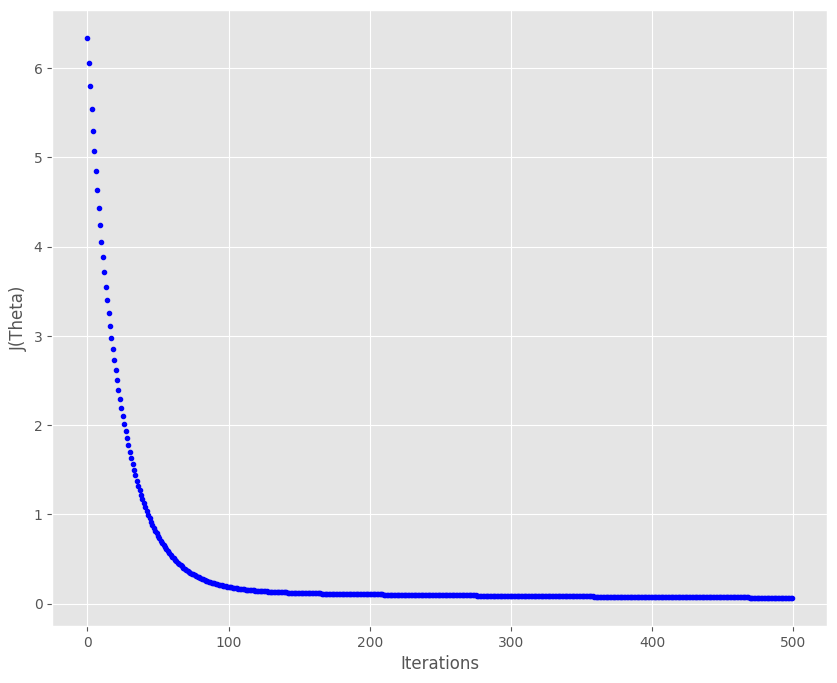

In [ ]:
theta = theta_guess.copy()
batch_size = 10

print("Start:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)

# Add a column of ones to the feature matrix X:
X_b = np.c_[X, np.ones((len(X), 1))]

# Run Gradient Descent:
theta, cost_history = minibatch_gradient_descent(
    X_b, y, theta, learning_rate, num_iterations, batch_size = batch_size
)
final_theta['MBGD']= theta

print("End:")
print(
    "w:          {:0.3f},\nb:          {:0.3f}".format(
        theta[0][0], theta[1][0]
    )
)
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))
final_cost['MBGD']= cost_history[-1]

fig,ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(num_iterations), cost_history,'b.')

### **TODO 7:**
Answer the following questions in the next cell.

For these algorithms: GD, SGD, SGD with momentum, MBGD, answer these questions:

1. Assuming the learning rate is the same for all algorithms, what is the worst case runtime complexity of each algorithm. Your answer should be a function of `num_samples`, `num_of_iteration`, and `batch_size`.

  Gradient Descent (GD): O(num_of_iterations * num_samples)   
  Stochastic Gradient Descent (SGD): O(num_of_iterations * num_samples)   
  SGD with Momentum: O(num_of_iterations * num_samples)   
  Mini-Batch Gradient Descent (MBGD): O(num_of_iterations * (num_samples / batch_size))

2. How would you compare the computation efficiency of each algorithm?  
  Gradient Descent (GD): Computationally intensive per iteration (uses all data points).    
  Stochastic Gradient Descent (SGD): Less intensive per iteration (uses one data point), but may need more iterations.   
  SGD with Momentum: Similar to SGD, but typically converges faster due to momentum term.   
  Mini-Batch Gradient Descent (MBGD): Balances between GD and SGD, using a subset of data points per iteration for improved efficiency.
3. How would momentum help with the convergence?  
  Momentum aids in speeding up SGD towards the correct direction while also reducing oscillations. This is achieved by incorporating a portion of the previous update vector into the current update. Such a method facilitates quicker convergence, particularly in cases where gradients are noisy or sparse.
4. How would different learning rate values affect gradient descent algorithms?

  A large learning rate might result in rapid convergence to a less-than-ideal solution, or it could even cause divergence. Conversely, a small learning rate slows down the convergence process, yet it might achieve a more accurate or optimal solution.
5. Does gradient descent always converge to optimum?  
  Gradient descent isn't guaranteed to reach the global optimum, particularly with non-convex functions. It may become trapped in local minima or saddle points. However, if the function is convex, the likelihood of converging to the global optimum increases.
6. What are overfitting and underfitting in machine learning? How to reduce overfitting and underfitting? Check this [reference](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/).  
  Overfitting happens when a model excessively learns from the training data, including noise, leading to poor performance on unseen data. Underfitting occurs when a model is too simplistic, failing to learn the essential patterns in the data, and performs poorly on both training and new data.

  To mitigate overfitting:   
  Increase the amount of training data.  
  Implement regularization methods (such as L1 or L2).   
  Utilize dropout techniques.   
  Simplify the model to make it less complex.    
  Employ cross-validation.   
  Stop training early to prevent over-learning.   
  To address underfitting:   
  Enhance the model's complexity.   
  Extend the training duration.   
  Improve input data through feature engineering.   

Your anwser:

## Linear Regression with PyTorch

Linear Regression can be implemented using PyTorch by defining a linear regression model, specifying a loss function (usually mean squared error), and using an optimization algorithm (e.g., stochastic gradient descent) to update the model parameters to minimize the loss.

### **TODO 8:**
In the next cell write a function to perform linear regression using PyTorch. Check this [reference](https://www.geeksforgeeks.org/linear-regression-using-pytorch/).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_linear_regression(X, y, optimizer_type='SGD', learning_rate=0.01, num_epochs=1000):
    """
    Train a linear regression model using PyTorch.

    Parameters:
    - X (torch.Tensor): Input data tensor of shape (num_samples, num_features).
    - y (torch.Tensor): Target data tensor of shape (num_samples, num_targets).
    - optimizer_type (str): Type of optimizer to use. Options: 'SGD', 'Adam', etc.
    - learning_rate (float): Learning rate for the optimizer.
    - num_epochs (int): Number of training epochs.

    Returns:
    - model (nn.Module): Trained linear regression model.
    """
    # Define a linear regression model as a Class and within the constructor
    # initilize a linear layer named `linear` instantiated from torch.nn.Linear
    class LinearRegressionModel(nn.Module):
        def __init__(self, input_size, output_size):
            super(LinearRegressionModel, self).__init__()
            self.linear = nn.Linear(input_size, output_size)

        def forward(self, x):
            return self.linear(x)

    # Instantiate the model
    input_size = X.shape[1]
    output_size = y.shape[1]
    model = LinearRegressionModel(input_size, output_size)

    # Define the loss function and optimizer
    criterion  = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass: Compute predicted y by passing x to the model
        pred_y = model(X)

        # Compute and print loss
        loss = criterion(pred_y, y)

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

Run your implementation `train_linear_regression`.
Plot the trained line on top of the data plot.
Print your model parameters $\theta$.

weight = tensor(2.4454)
bias = tensor(2.9386)


Text(0.5, 1.0, 'Linear Regression')

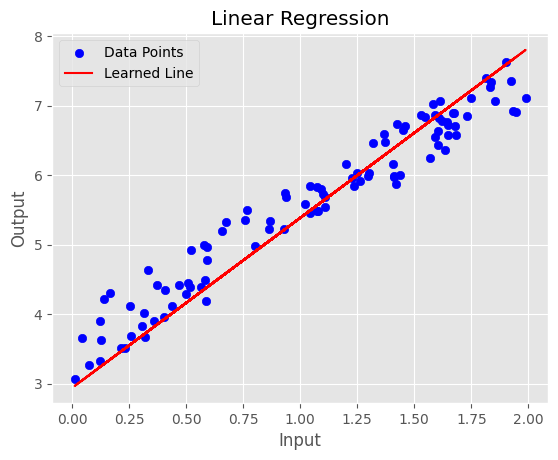

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
trained_model = train_linear_regression(X_tensor, y_tensor, learning_rate=learning_rate, num_epochs=2000)

# Print the model parameters
weight, bias = trained_model.linear.weight[0].data[0], trained_model.linear.bias.data[0]
print("weight =", weight)
print("bias =", bias)

learned_line = weight * X + bias

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, learned_line, color='red', label='Learned Line')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Linear Regression')